## Занятие 4
## Математический анализ
## Анализ функции. Построение графика в matplotlib.pyplot
https://matplotlib.org
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
https://matplotlib.org/tutorials/text/annotations.html

In [8]:
# Импорт библиотеки matplotlib.pyplot обычно осуществляется так:
import matplotlib.pyplot as plt
from sympy import Symbol, symbols, S, solve, solveset, latex, fraction, Eq
from sympy.calculus.util import continuous_domain
# А для того, чтобы использовать все остальное, сделаем так:
import sympy
import numpy as np

### Задание 1
Найти точки пересечения графика функции $f(x) = (x^2 + 3 x - 2)\log_2(3x+1)$ с осями координат, построить график и отметить точки пересечения.

#### Указание. 
Определить функцию как в Примере 3, поскольку нужно будет использовать функцию  $\log_2(x)$ из каждого пакета sympy и numpy.
В numpy использовать $log2(x)$ для вычисления логарифма по основанию 2.

Сроить график только в пределах области определения функции. Точки пересечения с осью OX должны быть не только решениями соответствующего уравнения, но и принадлежать области определения функции.

[0, -3/2 + sqrt(17)/2]

/Users/petrkamnev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log2
  if __name__ == '__main__':


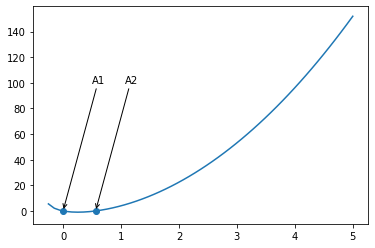

In [14]:
x = Symbol('x')
def f(x, lib='sympy'):
    if lib == 'sympy':
        log = lambda x : sympy.log(x,2)
    elif lib == 'numpy':
        log = np.log2
    else:
        return 'Wrong library name, only sympy or numpy is allowed'
    return (x**2 + 3*x - 2)*log(3*x + 1)

roots = []
for i in solve(f(x)):
    if(continuous_domain(f(x), x, S.Reals).contains(i)):
        roots.append(i)
display(roots)
y_coord = [0]*len(roots) 
X = np.linspace(-5, 5, 100)
ax = plt.gca() 
ax.plot(X, f(X, lib='numpy'))
ax.scatter(roots, y_coord)
for i, x_coord in enumerate(roots): # Чтобы не писать много раз один длинный код, сделаем подписи в цикле
    ax.annotate('A' + str(i + 1),
            xy=(x_coord, y_coord[i]), xycoords='data', # Координаты подписываемой точки, туда ведет стрелка
            xytext=(x_coord + 0.5, y_coord[i] + 100), textcoords='data', # Координаты текста подписи, смещены от точки
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), # Описание стрелки
            )

### Задание 2
Найти асимптоты графика функции $g(x) = \frac{35x^2 + 4x - 15}{3x - 2}$, построить график и асимптоты, в легенду графика включить формулы функции и асимптот, подписать оси 'x' и 'y'.

FiniteSet(2/3)

oo

-oo

35/3

82/9

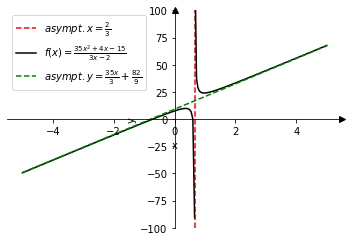

In [23]:
def f(x):
    return (35*x**2 + 4*x - 15)/(3*x - 2)
fnum, fdenom = sympy.fraction(f(x)) 
v_as = sympy.solveset(fdenom, x) 
display(v_as)
y0pos = f(x).limit(x, +sympy.oo)
y0neg = f(x).limit(x, -sympy.oo)
display(y0pos, y0neg)
kpos = sympy.limit(f(x)/x, x, +sympy.oo)
kneg = sympy.limit(f(x)/x, x, -sympy.oo)
if kpos == kneg:
    k = kpos
else:
    k = (kneg, kpos)
display(k)
b = sympy.limit(f(x) - k*x, x, sympy.oo)
display(b)
y_as = k*x +b
minY = -100  
maxY = 100
ax = plt.gca()
ax.set(ylim=(minY, maxY), xlabel = 'x', ylabel='y')
for item in v_as:
    ax.axvline(x=item, color='red', linestyle='--', label=r'$asympt. x=' + sympy.latex(item) + r'$')    
X1 = np.linspace(-5, float(item - 0.01), 100) 
X2 = np.linspace(float(item + 0.01), 5, 100)
Y1 = f(X1)
Y2 = f(X2)
ax.plot(X1, Y1, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$') # График левой ветви функции
ax.plot(X2, Y2, 'k-') # График правой ветви функции
ax.plot([X1[0], X2[-1]], [y_as.subs(x, X1[0]), y_as.subs(x, X2[-1])], 'g--', 
         label=r'$asympt. y=' + sympy.latex(y_as) + r'$')# График наклонной асимптоты
ax.legend(loc='best')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

### Задание 3.
Описать в виде функции траекторию пули, выпущенной со скоростью $v_0$ под углом $\alpha$ к горизонту (по умолчанию $v_0 = 0$, $\alpha = \pi/2$)
$$
\left\{
\begin{matrix}
x=v_0t\cos\alpha\\
y=v_0t\sin\alpha-\frac{10t^2}{2}
\end{matrix}
\right.
$$
Аргументы функции $t$, $v_0$ и $\alpha$, результат - два выражения $x$ и $y$, в соответствии с формулами, приведенными выше.

Определить соответствующий набору параметров $v_0$ и $\alpha$ диапазон значений параметра времени $t$, учитывая, что пуля не должна провалиться сквозь землю. 

Построить траектории при заданных значениях начальной скорости и угла на одном графике (($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2$, $\alpha = 1$)). Графики должны быть соответственно зеленого, красного и черного цвета. 

Подписать оси $x$, $y$.

В легенде отразить значения параметров, например, $v_0 = 2,\ \alpha = \pi/6$.

Название графика - Траектории пуль.
#### Указание.
Использовать $\sin$ из numpy.

Решить уравнение $y = 0$ относительно $t$, пользуясь solve или solveset, чтобы с помощью найденного значения $t$ определить правую границу значений $x$.

#### Решение.
Определим функцию, зададим списком данные наборы параметров ($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2.5$, $\alpha = 1$) и найдем значение параметра $t$, при котором  $y = 0$. Затем подстановкой subs в t_interval найдем наибольшее значение $t$ и построим графики:

1.05183873100987*cos(1)

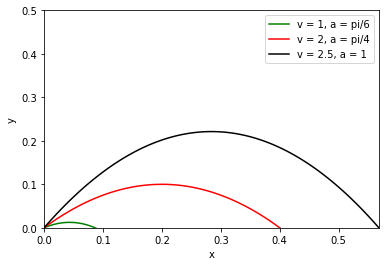

In [68]:
XMAX = -1
TMAX = -1
for v, a in [(1,sympy.pi/6), (2,sympy.pi/4), (2.5, 1)]:
    t = Symbol('t')
    #display((solve(v*t*sympy.sin(a) - 10*t*t/2)[1]))
    XMAX = max(XMAX,(v*t*sympy.cos(a)).subs(t,solve(v*t*sympy.sin(a) - 10*t*t/2)[1]))
    if XMAX == (v*t*sympy.cos(a)).subs(t,solve(v*t*sympy.sin(a) - 10*t*t/2)[1]):
        TMAX = solve(v*t*sympy.sin(a) - 10*t*t/2)[1]
display(XMAX)
ax = plt.gca()
ax.set(ylim=(0, 0.5),  xlim=(0,float(XMAX)), xlabel = 'x', ylabel = 'y')
T = np.linspace(0, float(TMAX), 100)
def f1(t, v, a):
    return float(v*t*sympy.cos(a))
def f2(t, v, a):
    return float(v*t*sympy.sin(a) - 10*t*t/2)

XY = []
for v, a, c in [(1, sympy.pi/6, 'green'), (2, sympy.pi/4, 'red'), (2.5, 1, 'black')]:
        ax.plot([f1(t, v, a) for t in T], [f2(t, v, a) for t in T], 'k-', label='v = ' + str(v) + ', a = ' + str(a), color = c)
ax.legend(loc='best')


### Индивидуальное задание.
Построить в одной координатной плоскости графики функций.

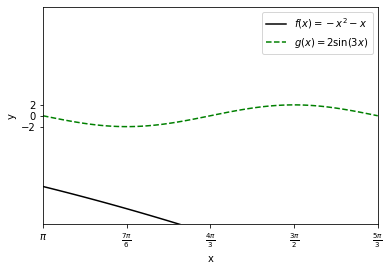

In [85]:
ax = plt.gca()
ax.set(ylim=(-20, 20),  xlim=(np.pi,5*np.pi/3), xlabel='x', ylabel='y', yticks=[-2,0,2])
ax.set_xticks([np.pi + np.pi*n/6 for n in range(5)])
ax.set_xticklabels([r'$' + latex(sympy.pi + sympy.pi*n/6) + r'$' for n in range(5)]) 
def f1(x):
    return -x*x - x
def f2(x):
    return float(2*sympy.sin(3*x))
X = np.linspace(float(sympy.pi), 5*float(sympy.pi)/3, 100)
Y1 = [f1(x) for x in X]
Y2 = [f2(x) for x in X]
ax.plot(X, Y1, 'k-', label=r'$f(x)=' + sympy.latex(f1(x)) + r'$', color = 'black')
ax.plot(X, Y2, 'k-', label=r'$g(x)=' + sympy.latex(2*sympy.sin(3*x)) + r'$', color = 'green', linestyle = '--')
ax.legend(loc='best')